In [12]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

%matplotlib inline

import os

In [22]:
DATA_ROOT = 'Data'
DB_NAME = 'amiunique-1month-aug17.sqlite3'

PATH_TO_DB = os.path.join(DATA_ROOT, DB_NAME)

In [23]:
con = sqlite3.connect(PATH_TO_DB)
df = pd.read_sql_query('select * from fpData', con)

In [19]:
# Look at the shape of the data
print(f"DF's Shape: {df.shape}")

DF's Shape: (26110, 35)


In [20]:
# Check to see if there are any missing values in the data
# Also, show an overview of the colums
df.isnull().any()

counter             False
id                  False
addressHttp         False
time                False
userAgentHttp       False
acceptHttp          False
hostHttp            False
connectionHttp      False
encodingHttp        False
languageHttp        False
orderHttp           False
pluginsJS           False
platformJS          False
cookiesJS           False
dntJS               False
timezoneJS          False
resolutionJS        False
localJS             False
sessionJS           False
IEDataJS            False
canvasJS            False
webGLJs             False
fontsFlash          False
resolutionFlash     False
languageFlash       False
platformFlash       False
adBlock             False
vendorWebGLJS       False
rendererWebGLJS     False
octaneScore         False
sunspiderTime       False
pluginsJSHashed     False
canvasJSHashed      False
webGLJsHashed       False
fontsFlashHashed    False
dtype: bool

In [93]:
# Overview of the data we're working with
# Maybe we should convert "not specified" and "not supported" to null values?
df.head()

,counter,id,addressHttp,time,userAgentHttp,acceptHttp,hostHttp,connectionHttp,encodingHttp,languageHttp,...,platformFlash,adBlock,vendorWebGLJS,rendererWebGLJS,octaneScore,sunspiderTime,pluginsJSHashed,canvasJSHashed,webGLJsHashed,fontsFlashHashed
0,426801,Not supported,55d1fdecf97155f039d7ebdf163d713744cce141,2017-08-04 10:00:00,Mozilla/5.0 (Windows NT 10.0; WOW64; rv:50.0) ...,Not specified,amiunique-backend,close,Not specified,Not specified,...,no JS,no JS,no JS,no JS,no JS,no JS,no JS,no JS,no JS,no JS
1,426802,318f6028-9fa0-4109-b693-ed12a5afca59,d7620ba0d1c08ec6359fcd8275fa32efb0b4d17b,2017-08-04 10:00:00,Mozilla/5.0 (Android 6.0.1; Mobile; rv:54.0) G...,"text/html,application/xhtml+xml,application/xm...",amiunique-backend,close,"gzip, deflate, br","de,de-DE;q=0.8,en-US;q=0.5,en;q=0.3",...,Flash not detected,no,ARM,Mali-400 MP,,,da39a3ee5e6b4b0d3255bfef95601890afd80709,d09b49abeb7bda6590206b65aa3f270181674d32,d1271016edb3b86ab21db854f6476944f643878f,ce30cd74ffc46157d73983a8599d5ed2d2564260
2,426803,Not supported,f4d7978e4bf9a3180a96d6c7824c53cc13dd4d44,2017-08-04 10:00:00,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,"text/html,application/xhtml+xml,application/xm...",amiunique-backend,close,"gzip, deflate, br","en-US,en;q=0.8,de;q=0.6,de-DE;q=0.4",...,no JS,no JS,no JS,no JS,no JS,no JS,no JS,no JS,no JS,no JS
3,426804,Not supported,ff3f9bf2797061dad81147e219e1bbda65e29df2,2017-08-04 10:00:00,Mozilla/5.0 (Windows; U; Windows NT 5.2; en-US...,Not specified,amiunique-backend,close,Not specified,Not specified,...,no JS,no JS,no JS,no JS,no JS,no JS,no JS,no JS,no JS,no JS
4,426805,Not supported,ae2faaf7e9e248db79a0e28f28b434b0db29e2af,2017-08-04 10:00:00,Mozilla/5.0 (Windows; U; Windows NT 5.2; en-US...,Not specified,amiunique-backend,close,Not specified,Not specified,...,no JS,no JS,no JS,no JS,no JS,no JS,no JS,no JS,no JS,no JS


In [94]:
# Functions that takes a column name in a DF and plots its histogram or KDE 
# if it's not categorical

def histogram_creator(variable_name):
    try:
        sns.countplot(data=df, x=variable_name)
        plt.title(
            f"Frequency of {variable_name} "
            f"({'unique' if df[variable_name].is_unique else 'not unique'})",
            fontsize = 15
        )
        plt.ylabel("Count", fontsize = 12)
        plt.xlabel(variable_name, fontsize = 12)
        plt.show()
    except:
        print(f"Error Plotting \"{variable_name}\"")
    
def kde_creator(variable_name):
    try:
        df[variable_name].value_counts().plot(kind = 'kde')
        plt.title(f"Frequency of {variable_name} "
                  f"({'unique' if df[variable_name].is_unique else 'not unique'})",
                  fontsize = 15)
        plt.ylabel("Count", fontsize = 12)
        plt.xlabel(variable_name, fontsize = 12)
        plt.show()
    except:
        print(f"Error Plotting \"{variable_name}\"")

In [95]:
# Place-holder for list creator of colums -- decide whether to histogram or kde plot

list_of_df_columns = list(df.columns.values)

columns_to_not_histogram = [
    'counter', 'id', 'addressHttp', 'time', 'userAgentHttp', 'acceptHttp', 'languageHttp', 
    'orderHttp', 'platformJS', 'timezoneJS', 'resolutionJS', 'canvasJS', 'webGLJs',
    'fontsFlash', 'rendererWebGLJS', 'pluginsJSHashed', 'canvasJSHashed', 'webGLJsHashed',
    'fontsFlashHashed'
]

columns_to_histogram = [i for i in list_of_df_columns if i not in columns_to_not_histogram]

###########################

columns_to_not_kde = [
    'counter', 'id', 'addressHttp' 'hostHttp', 'connectionHttp', 'encodingHttp',
    'cookieJS', 'dntJS', 'localJS', 'sessionJS', 'IEDataJS', 'canvasJS', 'webGLJs',
    'fontsFlash'
]

columns_to_kde = [i for i in list_of_df_columns if i not in columns_to_not_kde]

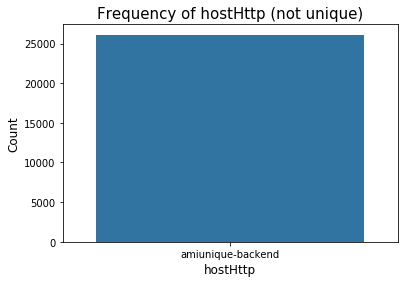

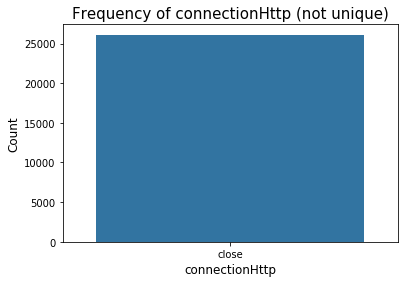

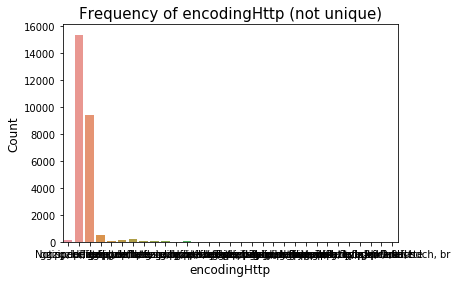

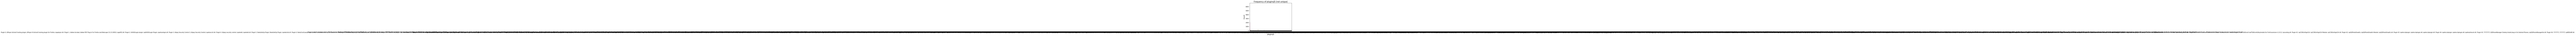

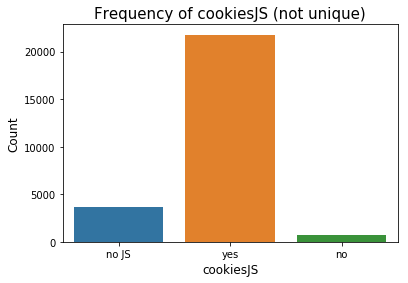

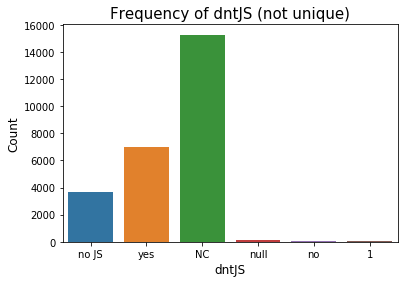

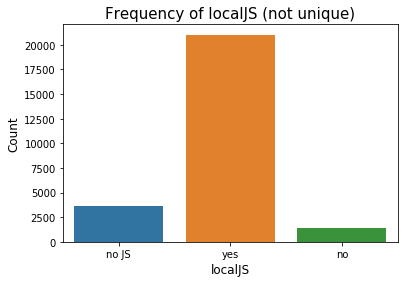

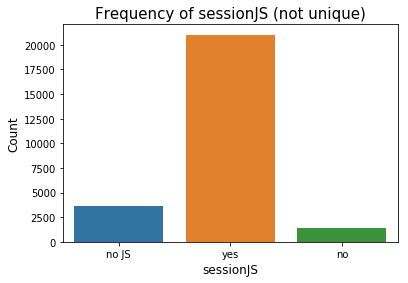

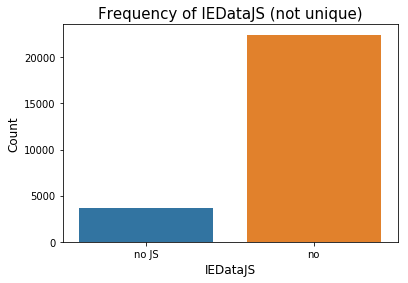

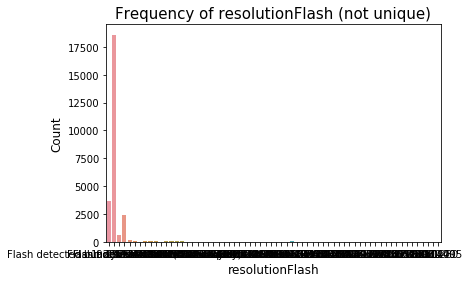

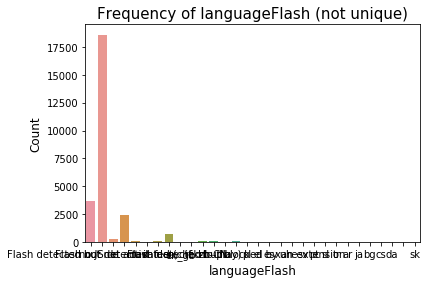

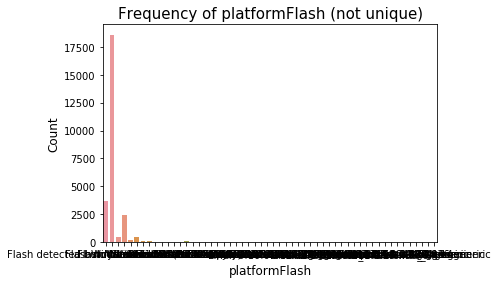

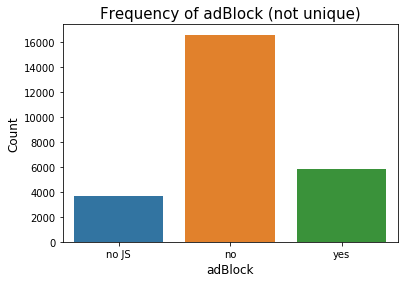

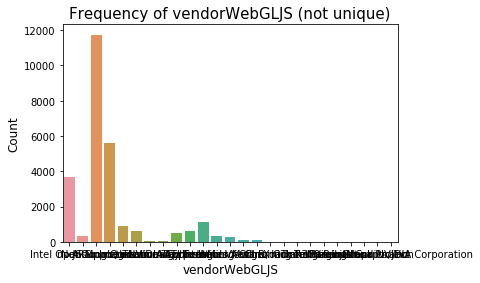

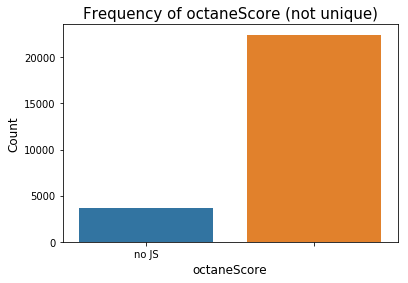

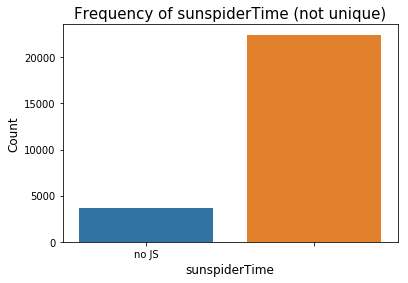

In [27]:
# Generate histogram plots

for column in columns_to_histogram:
    histogram_creator(column)

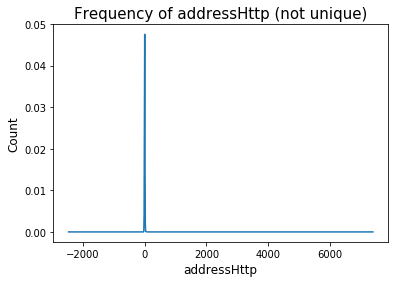

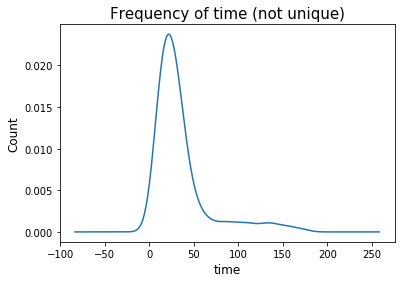

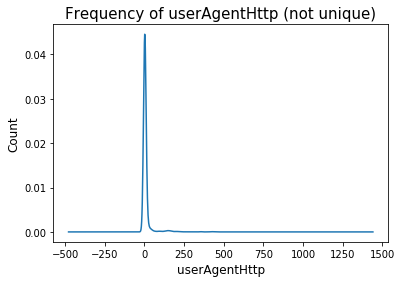

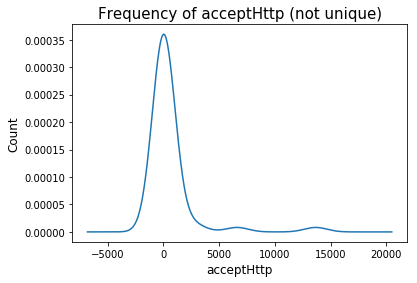

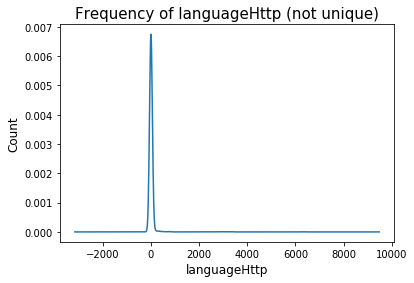

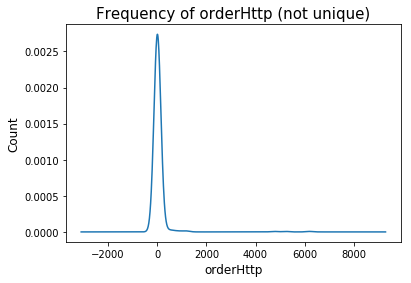

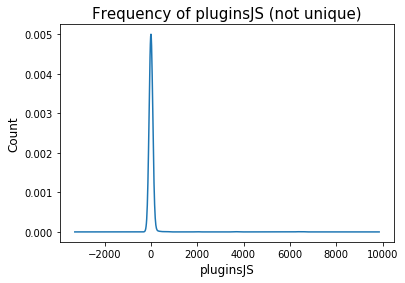

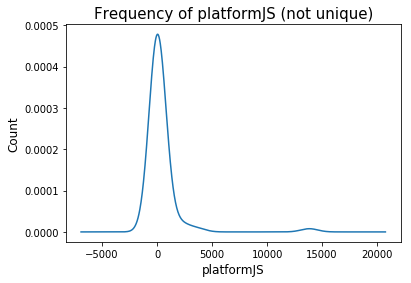

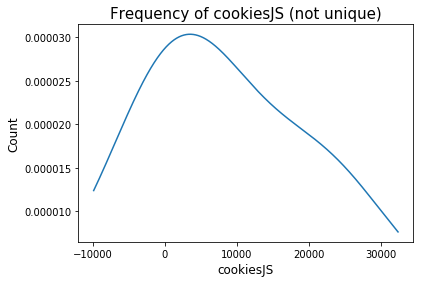

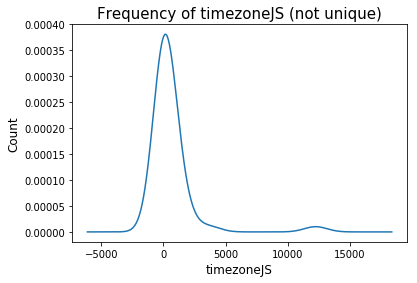

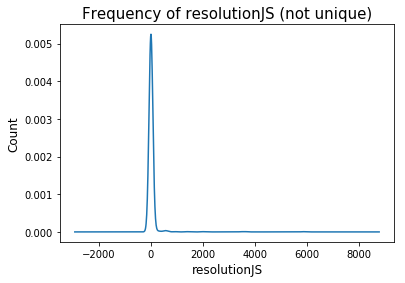

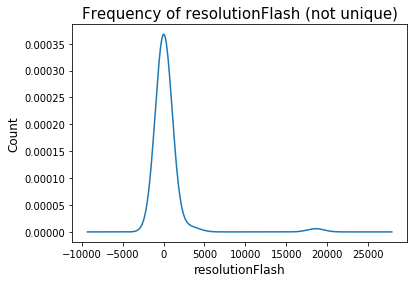

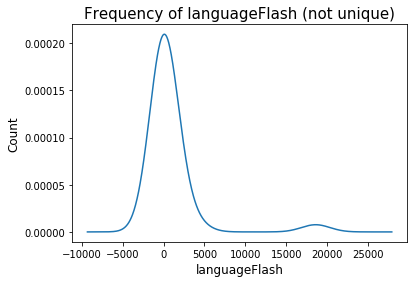

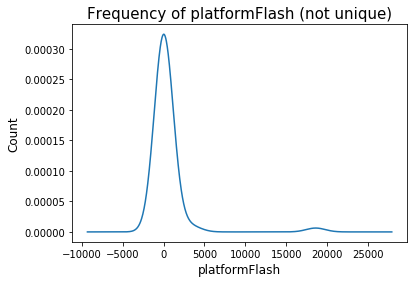

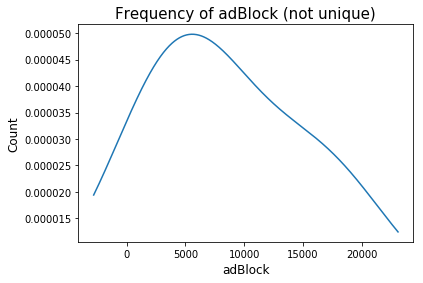

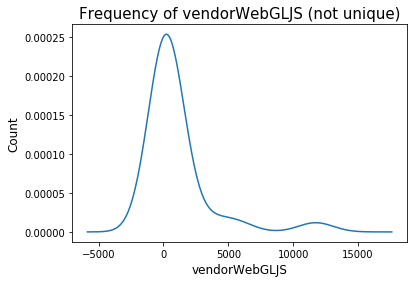

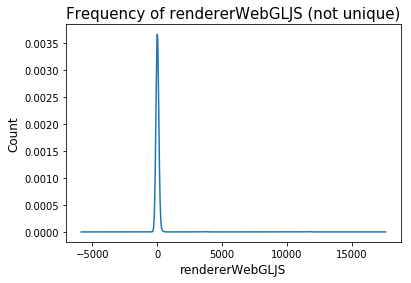

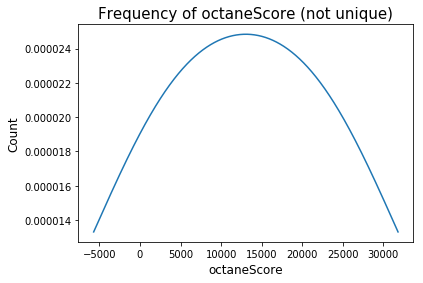

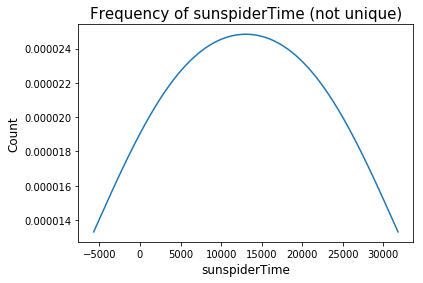

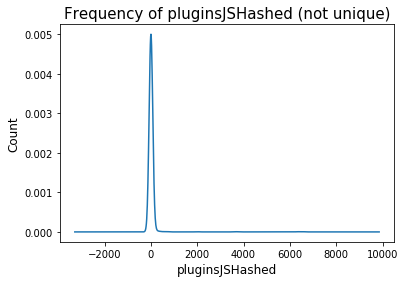

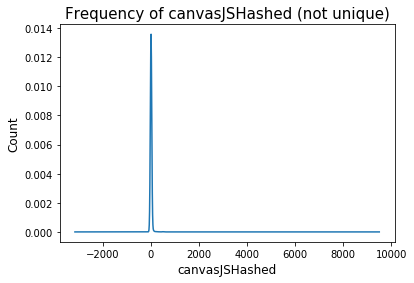

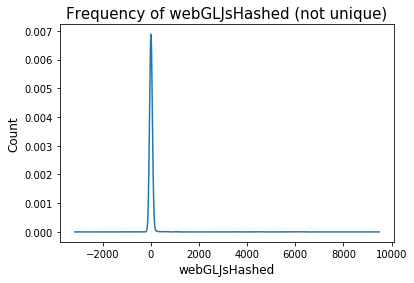

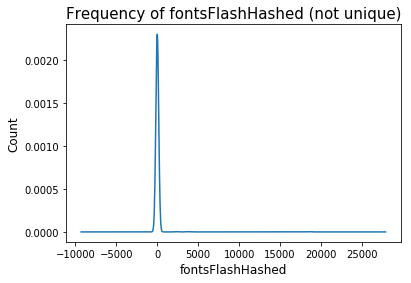

In [25]:
# Generate KDE plots

for column in columns_to_kde:
    kde_creator(column) 

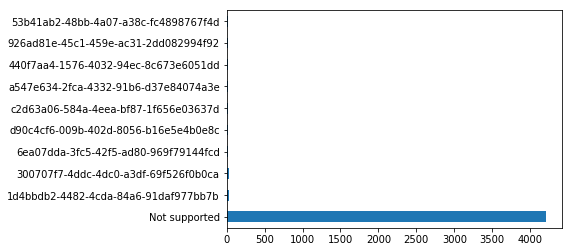

In [11]:
top_ten_ids = df.id.value_counts()[:10]
top_ten_ids.plot(kind='barh')

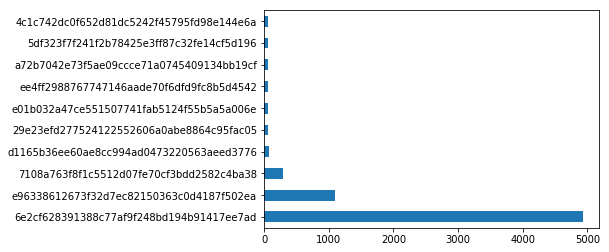

In [12]:
top_ten_addressHttp = df.addressHttp.value_counts()[:10]
top_ten_addressHttp.plot(kind='barh')

In [24]:
df['userAgentHttp1/3'] = df.userAgentHttp.str.extract('(.*?)\s\(', expand=True)
df['userAgentHttp2/3'] = df.userAgentHttp.str.extract('\s\((.*?)\)', expand=True)
df['userAgentHttp3/3'] = df.userAgentHttp.str.extract('\)(.*)', expand=True)
#######
#split_useragent = re.compile(r'''(
#    (?P<moz>.*?)\s\(      # Find the first block, usually "mozilla/5.0"
#    (?P<par>.*?)\)        # whatever is in the parenthesis
#    \s
#    (?P<res>.*)           # The rest
#    )''', re.VERBOSE)
#
#split_useragent.groupindex

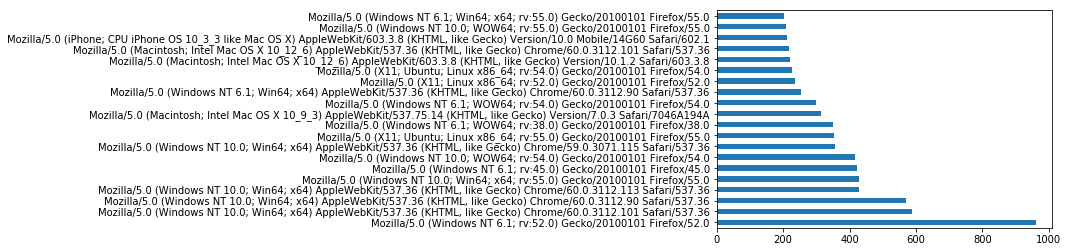

In [23]:
top_twenty_userAgent = df.userAgentHttp.value_counts()[:20]
top_twenty_userAgent.plot(kind='barh')

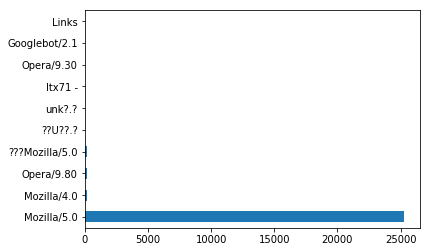

In [22]:
top_ten_userAgentFirst = df['userAgentHttp1/3'].value_counts()[:10]
top_ten_userAgentFirst.plot(kind='barh')

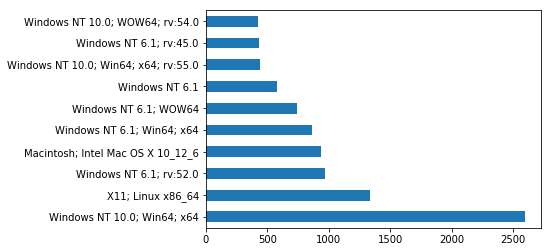

In [21]:
top_ten_userAgentSec = df['userAgentHttp2/3'].value_counts()[:10]
top_ten_userAgentSec.plot(kind='barh')

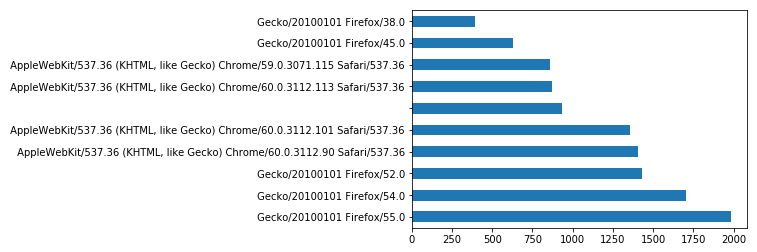

In [20]:
top_ten_userAgentThir = df['userAgentHttp3/3'].value_counts()[:10]
top_ten_userAgentThir.plot(kind='barh')

In [6]:
# calculate 'frequency' columns for id (which is UUID) and addressHttp (which is some other ID)
# insert these columns in the main data file for later analysis

df['id_freq'] = df.groupby('id')['id'].transform('count')
df['addressHttp_freq'] = df.groupby('addressHttp')['addressHttp'].transform('count')

In [7]:
# create a function for rearranging columns

def change_column_order(df, col_name, index):
    cols = df.columns.tolist()
    cols.remove(col_name)
    cols.insert(index, col_name)
    return df[cols]

In [8]:
# move the frequency columns next to their respective data columns

df = change_column_order(df, 'id_freq', 2)
df = change_column_order(df, 'addressHttp_freq', 4)

In [10]:
# find a substring 'bot' in the userAgentHttp column (assuming that only good bots identify themselves as bots)

df["GoodBot"] = df['userAgentHttp'].str.contains("bot") # creates a column of Boolean True or False values
df.GoodBot = df.GoodBot.astype(int) # converts True/False to 1/0
df["GoodBot"].value_counts()

0    25930
1      180
Name: GoodBot, dtype: int64

In [14]:
# create a new column for frequent ids if the same user has accessed the site >5 times (mark as 1, otherwise 0)

df['frequent_id'] = np.where(df['id_freq']>5, 1, 0)
df["frequent_id"].value_counts()

0    21069
1     5041
Name: frequent_id, dtype: int64

In [15]:
# create a new column for frequent ids who don't explicitly indicate themselves as good bots (mark as 1, otherwise 0)

df['frequent_id_notGoodBot'] = np.where(np.logical_and(df['id_freq']>5, df['GoodBot']==0), 1, 0)

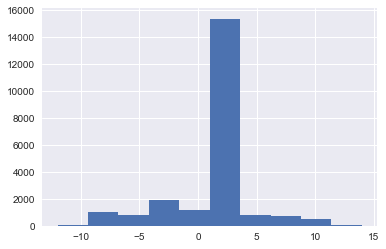

In [18]:
# converting times to a friendlier format: timezone's offset from GMT instead of GMT's offset from user's time zone
# also, dividing by 60 to show hours instead of minutes
# histogram shows the most visitors from GMT+2 where the site is located (France)

df['timezoneJS_nr']=pd.to_numeric(df['timezoneJS'], errors='coerce') # to avoid errors for "No JS" cells
df['timezone_to_GMT'] = df['timezoneJS_nr'].apply(lambda x: x//-60) 
df['timezone_to_GMT'].hist()